<centre> <h1> **Stock Price Prediction using Monte Carlo Simulation** </h1> <centre>

A stock represents fractional ownership of a corporation in proportion to the total number of shares of the company. \\
A Monte Carlo simulation is a model used to predict the probability of different outcomes when the intervention of random variables is present.
The basis of a Monte Carlo simulation involves assigning multiple values to an uncertain variable to achieve multiple results and then to average the results to obtain an estimate

#### **1. Importing Libraries** 

In [ ]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm 

#### **2. Importing Stock Data**
We import stock price of The Walt Disney Company from Yahoo. Then the data is made into a Data Frame using Pandas and the Data Frame is printed

In [ ]:
ticker = 'DIS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-1-1', end = '2017-02-03')['Adj Close']
data

,DIS
Date,
2010-01-04,27.933924
2010-01-05,27.864237
2010-01-06,27.716166
2010-01-07,27.724878
2010-01-08,27.768419
...,...
2017-01-30,106.238388
2017-01-31,105.960678
2017-02-01,106.583138


#### **3. Plotting Data**
Here we can see the variation of the price of a stock

Text(0, 0.5, 'Stock Price')

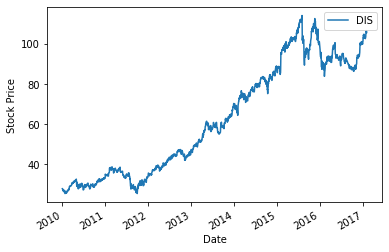

In [ ]:
data.plot()
plt.ylabel('Stock Price')

#### **4. Calculating Periodic Daily return**
The periodic return from stocks calculates the stock's growth for a given period of time. <br>
**periodic daily return** $= log(\dfrac{S_t}{S_{t-1}}) $ <br>
where  $S_t$ is the current price of the stock  
$S_{t-1}$ is the price of stock previous day






In [ ]:
prices = list(data[ticker])
periodic_daily_returns = []
for i in range(1, len(prices)):
    pdr = np.log(prices[i]/prices[i-1])
    periodic_daily_returns.append(pdr)
periodic_daily_returns = pd.DataFrame(periodic_daily_returns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f429843c250>>

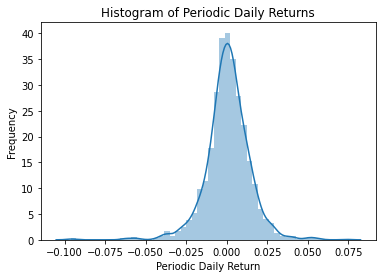

In [ ]:
ax = sns.distplot(periodic_daily_returns)
ax.set(xlabel='Periodic Daily Return', ylabel='Frequency', title = 'Histogram of Periodic Daily Returns')
ax.plot

Price of a the stock is given by the following formula: 
$S_t = S_{t-1} * e^r$ \\
where $S_t$ is the price of stock on the predicted day  
$S_{t-1}$ is the price of stock the previous day  
and **r** is the daily return \\


We use Brownian Motion as the main driver for estimating the return. It is a stochastic process used for modeling random behavior over time. Brownian motion has two main components:
1. Drift
2. Volatility



#### **5. Calculating Drift**
Drift is the direction that rates of returns have had in the past. That is, the expected return of the stock. \\
$ Drift = \mu - \frac{\sigma^2}{2}$ \\
where $\mu$ is the mean periodic return and $\sigma$ is the standard deviation of periodic daily returns


In [ ]:

mean_pdr = periodic_daily_returns.mean()
var_pdr = periodic_daily_returns.var()
std_pdr = periodic_daily_returns.std()
drift = mean_pdr - (var_pdr*0.5)
drift

0    0.000654
dtype: float64

#### **6. Calculating Volatility**
Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index. The historical volatility multiplied by a random, standard normal variable.


$Volatility = \sigma Z[Rand(0;1)]$ \\
where $\mu$ is the mean periodic return and $\sigma$ is the standard deviation of periodic daily returns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

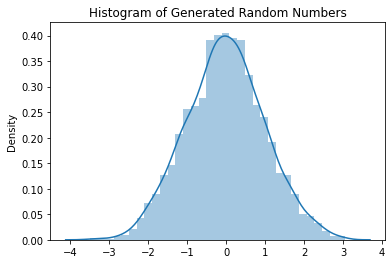

In [ ]:
days = 50
trials = 50
Z = norm.ppf(np.random.rand(days, trials)) # Generating random numbers from normal distribution
hist = sns.distplot(Z)
hist.set_title('Histogram of Generated Random Numbers')
hist.plot()

In [ ]:
e_r = np.exp(drift.values + std_pdr.values * Z)
e_r

array([[1.02899705, 1.00826587, 1.00635273, ..., 0.99030851, 1.00415399,
        1.01608183],
       [1.00771965, 1.00145092, 1.00355159, ..., 1.01454243, 1.00486985,
        1.0060453 ],
       [0.96834186, 0.98172188, 1.00804642, ..., 1.00684834, 0.98894582,
        1.01126372],
       ...,
       [1.00378956, 1.00756995, 0.9956975 , ..., 0.99185025, 0.99144954,
        1.0209607 ],
       [1.00204615, 1.01824365, 1.01251221, ..., 1.001244  , 1.00009095,
        0.9977953 ],
       [0.99970028, 1.00222848, 0.99801727, ..., 1.00181082, 0.99681288,
        1.00502621]])

#### **7. Estimating Price Paths**
Price paths are estimated using the formula discussed above.

In [ ]:
price_paths = np.zeros_like(e_r )
price_paths[0] = data.iloc[-1]
for i in range(1, days):
    price_paths[i] = price_paths[i-1]*e_r[i] # S(t) = S(t-1)*e^r
#print(price_paths.shape)
actual_val = pd.DataFrame()
actual_val[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2017-02-03', end = '2017-03-25')['Adj Close']
t = actual_val.reset_index()
result = pd.DataFrame()
result['Date'] = t['Date']
price_paths = pd.DataFrame(price_paths)
prices = pd.concat([result, price_paths.reindex(result.index)], axis=1)
prices.set_index('Date', inplace = True)
prices

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-02-03,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519,105.625519
2017-02-06,106.440910,105.778773,106.000658,106.407253,108.172732,109.476707,105.082474,105.025968,103.942992,105.714945,104.891656,107.538913,103.869811,104.369992,106.898028,104.142690,105.552138,106.306334,103.530381,103.083185,107.385793,105.685662,105.223766,105.964014,103.617128,106.126134,107.981470,106.033811,104.123641,105.191060,103.745338,103.094561,105.834877,106.863187,105.462659,105.352109,106.457296,107.913471,104.002412,106.473329,105.511636,106.237197,106.619428,105.198572,108.620069,105.097095,106.129790,107.161571,106.139899,106.264057
2017-02-07,103.071189,103.845336,106.853584,109.792833,105.469010,110.074382,106.861573,106.391461,107.248954,106.060418,103.535234,109.369253,103.457558,102.835553,105.933047,103.499832,103.872376,105.380967,103.458961,103.754248,105.801920,106.421349,105.017908,105.714331,102.304683,107.643834,107.794491,108.519234,104.208979,105.818542,103.444556,104.645965,107.222471,104.327068,108.155468,103.509057,106.961399,109.251754,105.296817,106.136789,104.581971,108.114748,108.088446,105.137726,108.818161,105.641157,104.058502,107.895449,104.966610,107.460986
2017-02-08,107.247693,102.631494,107.979675,107.130798,105.786929,109.006372,108.352053,104.434470,108.281575,107.076354,102.878920,107.843242,103.585457,101.737701,108.609267,102.490843,103.679598,106.725062,103.411131,101.625558,106.600763,108.165300,104.679386,107.724331,102.963392,107.709010,109.139087,106.476524,105.786542,105.423694,102.255161,104.302882,107.715216,105.001103,111.856567,103.402265,107.765917,110.107368,103.712483,108.291905,103.120255,107.473866,108.966398,104.599004,107.424142,107.012304,104.937798,109.131325,104.986081,109.971464
2017-02-09,105.372114,103.310408,109.602653,109.069062,104.265822,108.879137,107.780817,104.545643,107.511552,106.029490,103.478107,108.749101,107.230605,104.330716,109.312830,102.396583,106.948598,107.247249,103.345344,104.598882,105.129082,107.374688,105.618805,107.425211,101.609245,108.272187,111.862016,109.444390,105.824397,104.405873,101.570125,106.221624,108.075433,104.798753,112.271120,103.564810,110.017037,110.201493,100.989615,107.781267,106.501774,108.047826,110.269355,101.284126,107.579906,107.888111,101.827671,107.944926,103.538517,110.112734
2017-02-10,106.474344,101.688072,110.787303,109.007706,104.143692,107.140184,108.612970,105.236704,106.392358,107.305003,104.308389,110.190585,106.222099,105.454122,108.797817,101.522550,107.476943,107.320256,103.650779,102.492829,107.638581,110.524472,104.751429,108.511935,102.588612,110.675457,110.501361,109.861943,106.511754,105.096229,99.567428,105.973158,108.624303,104.298254,112.708829,100.942212,110.220861,109.978296,101.287251,109.042848,104.383631,106.704905,112.401197,102.791429,108.885023,108.193228,101.173729,108.781140,104.665205,111.775323
2017-02-13,107.441609,99.749050,109.817409,107.656524,104.127168,107.244708,108.383764,104.534601,104.787771,107.492456,103.970502,111.302439,108.627000,106.831762,110.055638,102.376828,107.325894,105.888330,101.163680,103.673457,105.725524,110.527391,106.356536,107.426591,104.032781,111.046289,109.626819,108.313615,106.129929,105.052302,99.807126,105.769850,109.162484,104.583278,111.670765,100.988842,111.412527,108.186532,101.219782,1

#### **8. Plotting Price Paths**

Text(0, 0.5, 'Stock Price')

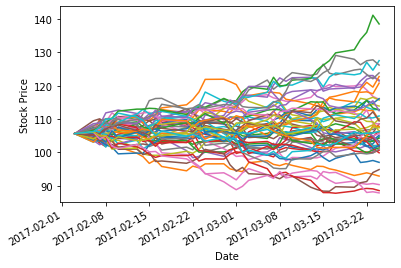

In [ ]:
prices.plot(legend= False)
plt.ylabel('Stock Price')

In [ ]:
# Function to find the probability of a certain outcome(Stock Price)
def probs_find(predicted, higherthan):
  predicted0 = predicted.iloc[0,0]
  predicted = predicted.iloc[-1]
  predList = list(predicted)
  over = [i for i in predList if (i-predicted0)/predicted0 >= higherthan]
  less = [i for i in predList if (i-predicted0)/predicted0 < higherthan]
  return (len(over)/(len(over)+len(less)))

#### **9. Estimating the Price of stock for a single day**
The price of stock on 24th March 2017 is estimated and the result is compared against the actual price of stock on that day.

In [ ]:
prob = probs_find(prices,0)
expt_val = prices.iloc[-1].mean()
act_val = actual_val.iloc[-1,-1]
expt_retrn = np.log(prices.iloc[-1].mean()/prices.iloc[0,1])*100 
actual_return = np.log(actual_val.iloc[-1,-1]/actual_val.iloc[0,0])*100
print('_______________________________________________')
print('|estimated value of stock: |       {}     |'.format(round(expt_val,2)))
print('-----------------------------------------------')
print('|actual value of stock:    |       {}     |'.format(round(act_val,2)))
print('-----------------------------------------------')
print('|estimated return:         |       {} %     |'.format(round(expt_retrn,2)))
print('-----------------------------------------------')
print('|actual return:            |       {}%      |'.format(round(actual_return,2)))
print('-----------------------------------------------')
print('|probability of Occurence: |       {}       |'.format(round(prob, 2)))
print('_______________________________________________')

_______________________________________________
|estimated value of stock: |       108.04     |
-----------------------------------------------
|actual value of stock:    |       107.39     |
-----------------------------------------------
|estimated return:         |       2.26 %     |
-----------------------------------------------
|actual return:            |       1.65%      |
-----------------------------------------------
|probability of Occurence: |       0.58       |
_______________________________________________


#### **10. Estimating the stock price for a time period**
The price of stock is estimated for a period of time using the same method as above. The actual price and estimated price is made into a Data Frame.

In [ ]:
est_prices = []
for i in range(prices.shape[0]):
    p = prices.iloc[i].mean()
    est_prices.append(p)
actual_val['Estimated price'] = est_prices
actual_val.rename(columns = {ticker: 'Actual Price'}, inplace = True)
actual_val

,Actual Price,Estimated price
Date,,
2017-02-03,105.625519,105.625519
2017-02-06,104.926453,105.754751
2017-02-07,104.380600,105.874523
2017-02-08,104.380600,106.144314
2017-02-09,104.849838,106.429137
2017-02-10,104.629601,106.665695
2017-02-13,105.003067,106.595317
2017-02-14,105.654243,106.343718
2017-02-15,105.510605,106.177371


#### **11. Plotting Actual price and Estimated price of stock**
The actual and estimated price of stock for a given time period is plotted. The plot can be used to visually compared the difference in both the price variation. 

Text(0.5, 1.0, 'Actual Prices of Stock & Estimated Price of Stock')

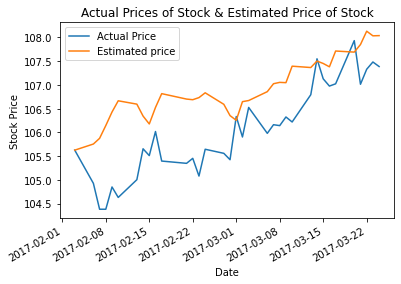

In [ ]:
actual_val.plot()
plt.ylabel('Stock Price')
plt.title('Actual Prices of Stock & Estimated Price of Stock')

### **10. Conclusion**
Difference between the actual and estimated price is negligible. So, Monte Carlo Simulation is an effective method to predict stock prices. However, this method does not take other factors (such as market sentiments, firm related issues) into account, which may affect the market while estimating the stock price. Hence, at times this method can prove to be inaccurate. A good example of such a case is the variation of stock price when the outbreak of COVID 19 hit the news.  
